In [1]:
from sklearn.feature_extraction import DictVectorizer

In [2]:
# DictVectorizer는 사전 형태로 되어 있는 feature 정보를 matrix 형태로 변환하기 위한 것
v = DictVectorizer(sparse = False)
D = [{'A':1, 'B':2}, {'B':3, 'C':5}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 5.]])

In [3]:
v.inverse_transform(X)

[{'A': 1.0, 'B': 2.0}, {'B': 3.0, 'C': 5.0}]

In [4]:
v.transform({'C':4, 'D':3 })

array([[0., 0., 4.]])

# CountVectorizer
CountVectorizer는 다양한 인수를 가진다. 그 중 중요한 것들은 다음과 같다.

- stop_words : 문자열 {‘english’}, 리스트 또는 None (디폴트)
- stop words 목록.‘english’이면 영어용 스탑 워드 사용.
- analyzer : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램
- tokenizer : 함수 또는 None (디폴트)
토큰 생성 함수 .
- token_pattern : string
토큰 정의용 정규 표현식
- ngram_range : (min_n, max_n) 튜플
n-그램 범위
- max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
단어장에 포함되기 위한 최대 빈도
- min_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
단어장에 포함되기 위한 최소 빈도
- vocabulary : 사전이나 리스트
단어장

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'this is the second document',
    'and the third'
]
vect = CountVectorizer()
vect.fit(corpus)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'second': 4,
 'the': 5,
 'third': 6,
 'this': 7}

In [7]:
vect.transform(['This is']).toarray()

array([[0, 0, 0, 1, 0, 0, 0, 1]], dtype=int64)

In [8]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

# Stop Words
- Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 **관사나 접속사, 한국어의 조사** 등이 여기에 해당한다. stop_words 인수로 조절할 수 있다.


In [9]:
vect = CountVectorizer(stop_words=["and"]).fit(corpus)
vect.vocabulary_

{'document': 0,
 'first': 1,
 'is': 2,
 'second': 3,
 'the': 4,
 'third': 5,
 'this': 6}

# Tokenizer
- analyzer, tokenizer, token_pattern 등의 인수로 사용할 토큰 생성기를 선택할 수 있다.

In [10]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{' ': 0,
 '.': 1,
 'a': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'h': 7,
 'i': 8,
 'm': 9,
 'n': 10,
 'o': 11,
 'r': 12,
 's': 13,
 't': 14,
 'u': 15}

In [11]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'third': 1, 'this': 2}

In [21]:
# 알파벳 순서순 word_tokenizing.
import nltk
nltk.download("punkt")
vect = CountVectorizer(tokenizer = nltk.word_tokenize).fit(corpus)
vect.vocabulary_

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adonishan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'.': 0,
 'and': 1,
 'document': 2,
 'first': 3,
 'is': 4,
 'second': 5,
 'the': 6,
 'third': 7,
 'this': 8}

# n-gram
- n-그램은 단어장 생성에 사용할 토큰의 크기를 결정한다. 1-그램은 토큰 하나만 단어로 사용하며 2-그램은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [24]:
vect = CountVectorizer(ngram_range=(2,2)).fit(corpus)
vect.vocabulary_

{'and the': 0,
 'first document': 1,
 'is the': 2,
 'second document': 3,
 'the first': 4,
 'the second': 5,
 'the third': 6,
 'this is': 7}

In [27]:
# 빈도수
# max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 
# 토큰의 빈도가 max_df로 지정한 값을 초과 하거나 min_df로 지정한 값보다 작은 경우에는 무시한다. 
# 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_

{'document': 0, 'is': 1, 'the': 2, 'this': 3}

In [28]:
vect.stop_words_

{'and', 'first', 'second', 'third'}

In [29]:
vect.transform(corpus).toarray().sum(axis=0)

array([2, 2, 3, 2], dtype=int64)

In [31]:
# TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩
# 공통적으로 들어있는 단어의 가중치를 축소
# tf(d,t) : 단어의 빈도수
# idf(d,t): inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.43306685, 0.56943086, 0.43306685, 0.        ,
        0.33631504, 0.        , 0.43306685],
       [0.        , 0.43306685, 0.        , 0.43306685, 0.56943086,
        0.33631504, 0.        , 0.43306685],
       [0.65249088, 0.        , 0.        , 0.        , 0.        ,
        0.38537163, 0.65249088, 0.        ]])

In [34]:
# Hashing Trick
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [35]:
#CountVectorizer
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

Wall time: 5.75 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [39]:
#Hashing Vectorizer
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=10)

In [41]:
%time hv.transform(twenty.data)

Wall time: 2.34 s


<11314x10 sparse matrix of type '<class 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

# Example
- using Scikit-learn

In [68]:
from urllib.request import urlopen
import json
import string
from konlpy.utils import pprint

from konlpy.tag import Hannanum
import nltk
hannanum = Hannanum()
#ipython file
f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")


In [51]:
json = json.loads(f.read())

In [54]:
# 여기에서는 하나의 문서가 하나의 단어로만 이루어져 있다. 

cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [
    w for w in hannanum.nouns(" ".join(cell)) if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))
]

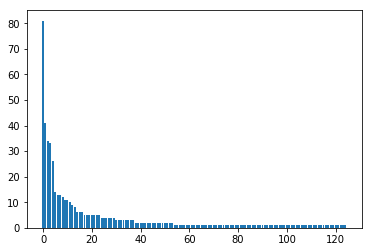

In [65]:
#백터의합으로 빈도 가시화 ->
# CountVectorizer로 이 문서 집합을 처리하면 각 문서는 하나의 원소만 1이고 나머지 원소는 0인 벡터가 된다. 
# 이 벡터의 합으로 빈도를 알아보았다.
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis = 0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()